<a href="https://colab.research.google.com/github/tpgus2603/DataMining/blob/main/AmazonDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
cd ./drive/MyDrive/json_csv_files/amazon_review2

[Errno 2] No such file or directory: './drive/MyDrive/json_csv_files/amazon_review2'
/content/drive/MyDrive/json_csv_files/amazon_review2


In [9]:
cd amazon_review2/

[Errno 2] No such file or directory: 'amazon_review2/'
/content/drive/MyDrive/json_csv_files/amazon_review2


In [10]:
# local에 padnas, numpy, matplotlib 설치필요
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Amazon Data

**1-1. Used Data**

*   https://amazon-reviews-2023.github.io/






In [11]:
def preprocess_review(review_path, min_user_cnt=1, min_review_cnt=1):
    review_df = pd.read_json(review_path, lines=True)
    filtered_review_df = review_df[["parent_asin", "rating", "user_id", "title", "category", "product_title"]]
    distinct_review_df = filtered_review_df.drop_duplicates(subset=["user_id", "parent_asin"])

    review_counts = distinct_review_df["parent_asin"].value_counts()
    user_counts = distinct_review_df['user_id'].value_counts()

    result_df = distinct_review_df[(
        (distinct_review_df['user_id'].isin(user_counts[user_counts >= min_user_cnt].index)) &
        (distinct_review_df['parent_asin'].isin(review_counts[review_counts >= min_review_cnt].index))
    )]

    return result_df

In [24]:
import os

review_path = './combined_data2.json'
raw_df = pd.read_json(review_path,lines="true")
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             100000 non-null  int64         
 1   title              100000 non-null  object        
 2   text               100000 non-null  object        
 3   images             100000 non-null  object        
 4   parent_asin        100000 non-null  object        
 5   user_id            100000 non-null  object        
 6   timestamp          100000 non-null  datetime64[ns]
 7   helpful_vote       100000 non-null  int64         
 8   verified_purchase  100000 non-null  bool          
 9   category           100000 non-null  object        
 10  product_title      95194 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(2), object(7)
memory usage: 7.7+ MB


In [25]:
review_df = preprocess_review(review_path)

In [13]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99520 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   parent_asin    99520 non-null  object
 1   rating         99520 non-null  int64 
 2   user_id        99520 non-null  object
 3   title          99520 non-null  object
 4   category       99520 non-null  object
 5   product_title  94714 non-null  object
dtypes: int64(1), object(5)
memory usage: 5.3+ MB


In [14]:
# object 타입 컬럼에 대해 요약 통계 계산
review_df[["parent_asin","user_id","title","category","product_title"]].describe()

,parent_asin,user_id,title,category,product_title
count,99520,99520,99520,99520,94714
unique,77190,23142,68921,10,72541
top,B079TRNVHX,AFZUK3MTBIBEDQOPAK3OATUOUKLA,Five Stars,Movies_and_TV,Tara's All Natural Handcrafted Gourmet Sea Sal...
freq,1044,1492,6555,10000,1049


In [15]:
# float64 타입 컬럼에 대해 요약 통계 계산
review_df[["rating"]].describe()

,rating
count,99520.000000
mean,4.247176
std,1.231659
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [16]:
popular_items = (
    review_df.groupby(["parent_asin","category"])["user_id"]
    .count()
    .reset_index(name="num_reviews_item")
    .sort_values(by="num_reviews_item", ascending=False)
)

print("상위 30개의 인기 아이템:")
print(popular_items.head(30))

상위 30개의 인기 아이템:
      parent_asin                  category  num_reviews_item
42539  B079TRNVHX  Grocery_and_Gourmet_Food              1044
51656  B07T771SPH                  Software               103
22333  B00KDSGIPK                  Software                88
13361  B005ZXWMUS                  Software                84
15987  B0094BB4TW                  Software                82
29382  B017250D16                  Software                79
19703  B00FAPF5U0                  Software                74
36163  B01N0BP507                  Software                68
24320  B00P03D4D2                  Software                67
15760  B008XG1X18                  Software                60
23537  B00N28818A                  Software                60
25892  B00UC7DG6Q                  Software                50
29938  B018IOV40E                  Software                46
23061  B00LV4D70O                  Software                45
13427  B0063IH60K                  Software           

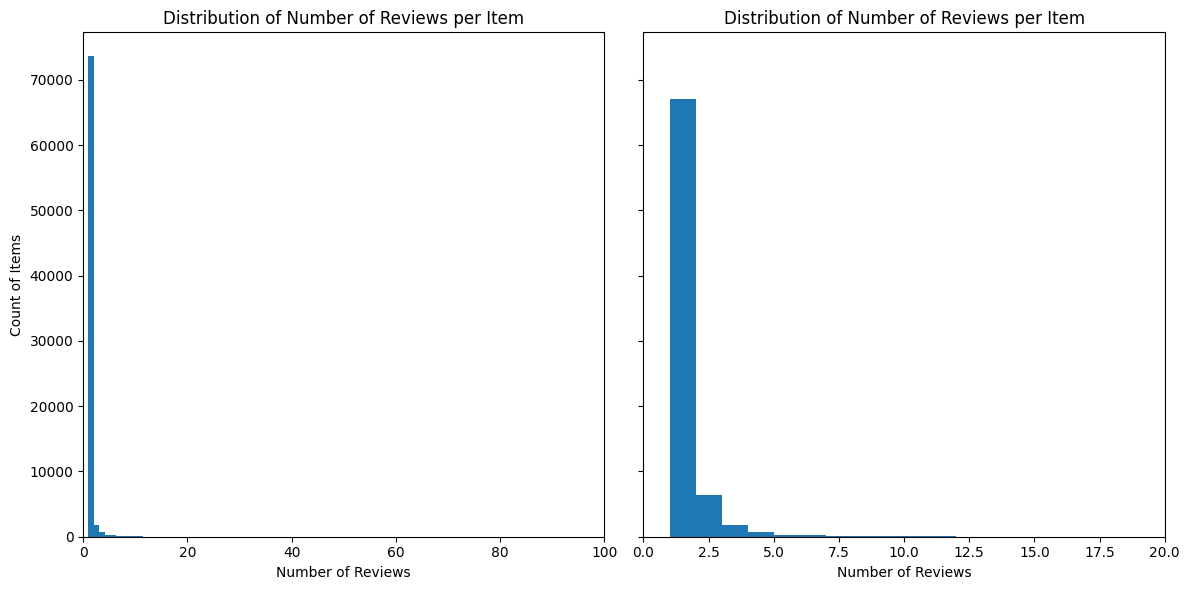

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

x_min = 0
x_max = 100
bins = range(x_min, x_max + 1)

# 첫 번째 플롯 (X <= 100)
axes[0].hist(popular_items['num_reviews_item'], bins=1000)
axes[0].set_title("Distribution of Number of Reviews per Item")
axes[0].set_xlim(0, 100)
axes[0].set_xlabel("Number of Reviews")
axes[0].set_ylabel("Count of Items")

# 두 번째 플롯 (X <= 20)
axes[1].hist(popular_items['num_reviews_item'], bins=bins)
axes[1].set_title("Distribution of Number of Reviews per Item")
axes[1].set_xlim(0, 20)
axes[1].set_xlabel("Number of Reviews")

plt.tight_layout()
plt.show()

In [18]:
user_activity_df = (
    review_df.groupby("user_id")["parent_asin"]
    .count()
    .reset_index(name="num_reviews_user")
    .sort_values(by="num_reviews_user", ascending=False)
)

print("상위 20명의 사용자 활동:")
print(user_activity_df.head(20))

상위 20명의 사용자 활동:
                            user_id  num_reviews_user
11432  AFZUK3MTBIBEDQOPAK3OATUOUKLA              1492
8474   AFJBKPK5W56XWSNPQU2WW66ISWYQ              1054
22279  AHV6QCNBJNSGLATP56JAWJ3C4G2A               942
10983  AFXF3EGQTQDXMRLDWFU7UBFQZB7Q               847
12404  AG73BVBKUOH22USSFJA5ZWL7AKXA               665
8710   AFKMX6JZ655VPVYHBTATZQS4IBOQ               632
21270  AHPOHKN4PU4W3V5PGFL7AGTAD2AA               597
9817   AFQQQ5LGNSQUEBGDCYBAZZE5T3DA               467
17345  AGZZXSMMS4WRHHJRBUJZI4FZDHKQ               454
8946   AFLX66DKF6R3H6OEOC3TIVAYXZIQ               396
7873   AFFZVSTUS3U2ZD22A2NPZSKOCPGQ               376
18601  AHATA6X6MYTC3VNBFJ3WIYVK257A               362
20170  AHJQPUQLSQZE6LMIUMY7WNRXCQQQ               322
16092  AGSXMEKFKM2HDFZ4UNE676O6D5LQ               315
21226  AHPFHP43AXWRYZZ4HPNCW7I7J3ZQ               307
5415   AEYGPUCRKH7G4VM22FM3VAKSQ23Q               301
5758   AF2BLE54TEMGZ546U763ZHZRXC4A               277
7423   AFDMZ

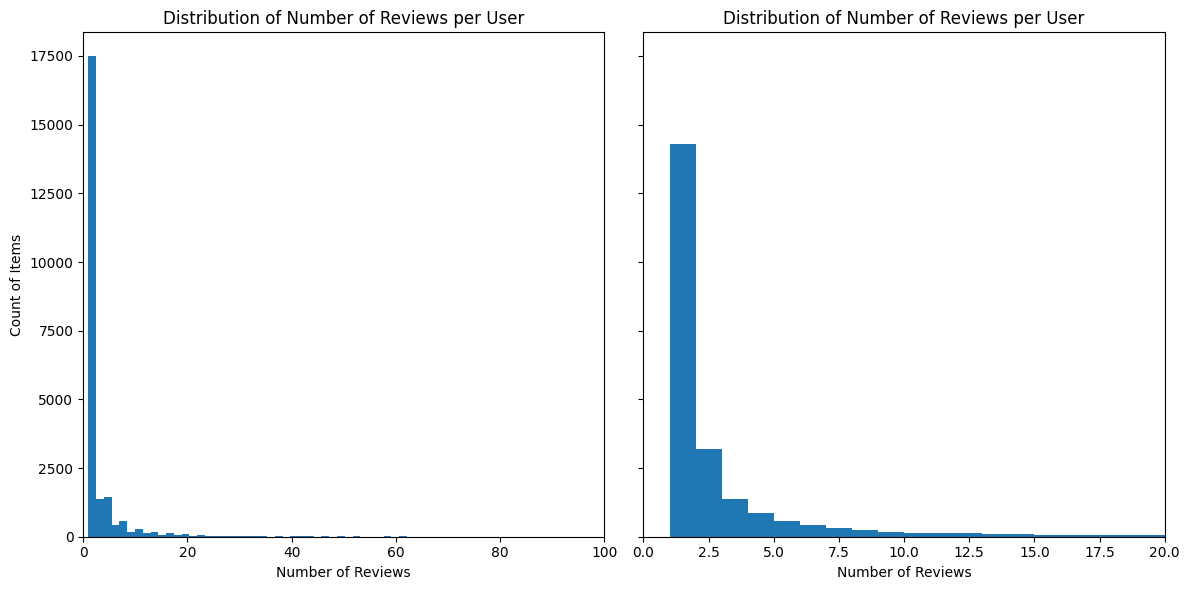

In [19]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

x_min = 0
x_max = 100
bins = range(x_min, x_max + 1)

# 첫 번째 플롯 (X <= 100)
axes[0].hist(user_activity_df['num_reviews_user'], bins=1000)
axes[0].set_title("Distribution of Number of Reviews per User")
axes[0].set_xlim(0, 100)
axes[0].set_xlabel("Number of Reviews")
axes[0].set_ylabel("Count of Items")

# 두 번째 플롯 (X <= 20)
axes[1].hist(user_activity_df['num_reviews_user'], bins=bins)
axes[1].set_title("Distribution of Number of Reviews per User")
axes[1].set_xlim(0, 20)
axes[1].set_xlabel("Number of Reviews")

plt.tight_layout()
plt.show()

In [20]:
rating_counts = (
    review_df.groupby("rating")
    .size()
    .reset_index(name="count")
    .sort_values(by="rating")
)

print("rating별 리뷰 개수:")
print(rating_counts)

rating별 리뷰 개수:
   rating  count
0       1   7430
1       2   4549
2       3   7998
3       4  15558
4       5  63985


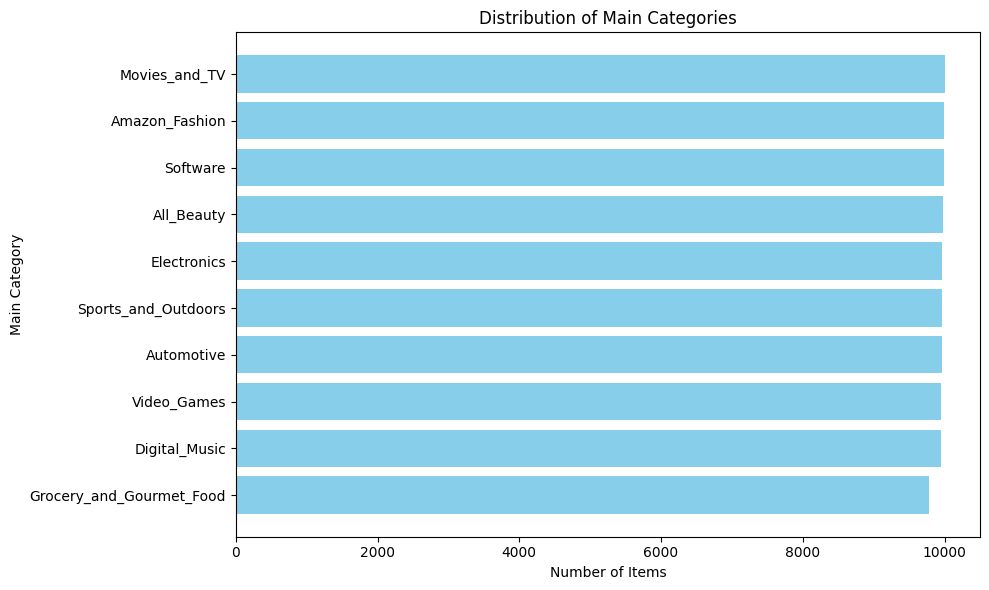

In [21]:
def visualize_category_distribution(result_df):
    """
    result_df에서 고유한 category의 분포를 시각화.
    """
    # 카테고리별 개수 집계 및 정렬
    category_counts = (
        result_df.groupby("category")
        .size()
        .reset_index(name="count")
        .sort_values(by="count", ascending=False)
    )

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(category_counts["category"], category_counts["count"], color="skyblue")
    plt.xlabel("Number of Items")
    plt.ylabel("Main Category")
    plt.title("Distribution of Main Categories")
    plt.gca().invert_yaxis()  # 카테고리를 내림차순으로 정렬
    plt.tight_layout()
    plt.show()

# 함수 호출
visualize_category_distribution(review_df)